(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2.]),
 array([0.2373866 , 0.24461262, 0.25183864, 0.25906466, 0.26629068,
        0.2735167 , 0.28074272, 0.28796874, 0.29519476, 0.30242078,
        0.3096468 , 0.31687282, 0.32409885, 0.33132487, 0.33855089,
        0.34577691, 0.35300293, 0.36022895, 0.36745497, 0.37468099,
        0.38190701, 0.38913303, 0.39635905, 0.40358507, 0.41081109,
        0.41803712, 0.42526314, 0.43248916, 0.43971518, 0.4469412 ,
        0.45416722, 0.46139324, 0.46861926, 0.47584528, 0.4830713 ,
        0.49029732, 0.49752334, 0.50474936, 0.51197538, 0.51920141,
        0.52642743, 0.53365345, 0.54087947, 0.54810549, 0.55533151,
        0.56255753, 0.56978355, 0.57700957, 0.58423559, 0.59146161,
        0.59868763]),
 <a list of 50 Patch objects>)

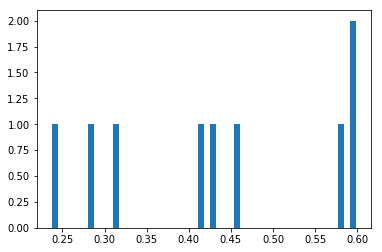

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.tight_layout()
import time

class site:
    def __init__(self, position, properties):
        self.index = position
        for name,value in properties.items():
            setattr(self, name, value)
        

class TransverseIsing:
    def __init__(self, inL, inT, inW):
        self.W = inW
        self.t = inT
        self.L = int(inL)
        self.system = []
        self.spectrum = []
        self.eigen = []
        self.x = []
        for i in range(self.L):
            self.x.append(np.exp(i * 1j * math.pi * 2 / self.L))
        self.x = np.diag(self.x)
        self.H = np.zeros((self.L,self.L)) + self.t*(np.diag(np.ones(self.L-1),1) + np.diag(np.ones(self.L-1),-1))
        for i in range(self.L):
            self.system.append(site(i, {'t':inT, 'U':np.random.uniform(-self.W/2,self.W/2)}))
            self.H[i,i] = self.system[i].U
        self.solve()
        
        
    def solve(self):
        temp = np.linalg.eigh(self.H)
        self.spectrum = temp[0]
        self.eigen = temp[1]
#        for wave in self.eigen:
 #           out, sub = plt.subplots(1)
  #          sub.plot(wave)



    def reparam(self, Wnew):
        self.W = Wnew
        self.rescramble()
    
    def rescramble(self, Wsingle = None):
        if Wsingle == None:
            Wsingle = self.W
        for i in range(self.L):
            self.system[i].U = np.random.uniform(-Wsingle/2,Wsingle/2)
            self.H[i,i] = self.system[i].U
        self.solve()
        
    def levelSpace(self):
        out = []
        for i in range(self.L-1):
            out.append(self.spectrum[i+1]-self.spectrum[i])
        return out
    
    def CoM(self, index=-.5):
        if not(index+.5):
            out = []
            for i in range(self.L):
                out.append(self.L/(2*math.pi) * np.imag(np.log(np.vdot(self.eigen[i], np.dot(self.x, self.eigen[i])))))
            return out
        else:
            if index == int(index) and abs(index + .5)<self.L:
                return (self.L/(2*math.pi) * np.imag(np.log(np.vdot(self.eigen[index], np.dot(self.x, self.eigen[index])))))
            else:
                print("CoM passed bad index")
                return
    
    def IPR(self, index=-.5):
        if not(index+.5):
            out = []
            for i in range(self.L):
                out.append(sum(np.power(np.absolute(self.eigen[i]),4)))
            return out
        else:
            if index == int(index) and abs(index + .5)<self.L:
                return sum(np.power(np.absolute(self.eigen[index]),4))
            else:
                print("IPR passed bad index")
                return
    
    def locLength(self, index=-.5):
        if not(index+.5):
            loclens = []
            centers = np.rint(self.CoM())
            for i in range(self.L):
                wf = self.eigen[i]
                loclens.append(0)
                for j in range(-int(self.L/2),int(self.L/2)):
                    loclens[-1] += np.sqrt((j*wf[int(centers[i])+j])**2)
            return loclens
        else:
            if index == int(index) and abs(index + .5)<self.L:
                wf = self.eigen[index]
                loclen = 0
                center = np.rint(self.CoM(index))
                for j in range(-int(self.L/2),int(self.L/2)):
                    loclen += np.sqrt((j*wf[int(center[index])+j])**2)
                return loclen
            else:
                print("locLength passed bad index")
                return
    
    def sweepRange(self,Wstart,Wstop,Wsteps,inFunct):
        Wstep = (Wstop - Wstart)/Wsteps
        outlist = []
        for w in np.arange(Wstart,Wstop,Wstep):
            self.reparam(w+Wstep)
            outlist.append(np.mean(inFunct()))
        return outlist
    
#    def WFout(self):
 #       vector = []
  #      for site in self.system:
   #         vector.append(site.wf)
    #    return vector
    
#    def E(self):
 #       E=0
  #      for i in range(int(-self.L/2),int(self.L/2)):
   #         E+=self.system[i].wf*self.Hi(i)
    #    return E
    
#    def Hi(self, i):
 #       return (t*(self.system[i-1].wf + self.system[i+1].wf) + self.system[i].U * self.system[i].wf)
    
#    def timeEvolve(self, dt):
#        wfnext = [0]*L
 #       for i in range(int(-L/2),int(L/2)):
  #          wfnext[i] = exp(j*dt*Hi(i))


L = 10
t = 1
W = .75

IsingT = TransverseIsing(L, t, W)


#print(gaussian.eigen[4])
#print(gaussian.CoM(),gaussian.spectrum)
#out, sub = plt.subplots(1)
#sub.hist(ander.levelSpace(),50)
#sub.plot(ander.sweepRange(0,10,200,ander.locLength))

